### Grid Searching Decision Trees

This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [4]:
print(list(range(1,16)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [5]:
params = {'max_depth': list(range(1,16)),
         'min_samples_split': list(range(2,11)),
          'criterion': ("log_loss", "entropy", "gini"),
          'min_samples_leaf': list(range(1,11))
         }

In [6]:
data = pd.read_csv('data/Whickham.txt')
data['smoker'] = data['smoker'].map({'Yes':1,'No':0})
X = data[['smoker', 'age']]
y = data['outcome'].map({'Alive':1,'Dead':0})


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y)

# Create matrices to store the various times and accuracy scores
times=[]
scores=[]



### Comparing Grid Searches

Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

# GridSearchCV

In [7]:
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree,param_grid=params)
grid.fit(X_train1,y_train1)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('log_loss', 'entropy', 'gini'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [8]:
df = pd.DataFrame(grid.cv_results_)
time = grid.cv_results_['mean_fit_time'].sum()
index = np.argmax(df['mean_test_score'])

times.append(time)
scores.append(df['mean_test_score'][index])

print(f'Compute time: {time}')
print(f'Parameters of Max Test Score: {df['params'][index]}')
print(f'Max Test Score: {df['mean_test_score'][index]}')

Compute time: 7.557807874679566
Parameters of Max Test Score: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Max Test Score: 0.8578680203045685


# RandomizedSearchCV

In [9]:
tree2 = DecisionTreeClassifier()
grid2 = RandomizedSearchCV(tree2,params)
grid2.fit(X_train1,y_train1)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('log_loss', 'entropy',
                                                      'gini'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]})

In [10]:
df2 = pd.DataFrame(grid2.cv_results_)
time2 = grid2.cv_results_['mean_fit_time'].sum()
index2 = np.argmax(df2['mean_test_score'])

times.append(time2)
scores.append(df2['mean_test_score'][index2])

print(f'Compute time: {time2}')
print(f'Parameters of Max Test Score: {df2['params'][index2]}')
print(f'Max Test Score: {df2['mean_test_score'][index2]}')

Compute time: 0.023533105850219727
Parameters of Max Test Score: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 1, 'criterion': 'gini'}
Max Test Score: 0.8578680203045685


# Halving Grid Search CV

In [11]:
tree3 = DecisionTreeClassifier()
grid3 = HalvingGridSearchCV(tree3,params)
grid3.fit(X_train1,y_train1)


HalvingGridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid={'criterion': ('log_loss', 'entropy', 'gini'),
                                'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15],
                                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10],
                                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]})

In [12]:
df3 = pd.DataFrame(grid3.cv_results_)
time3 = grid3.cv_results_['mean_fit_time'].sum()
index3 = np.argmax(df3['mean_test_score'])

times.append(time3)
scores.append(df3['mean_test_score'][index3])

print(f'Compute time: {time3}')
print(f'Parameters of Max Test Score: {df3['params'][index3]}')
print(f'Max Test Score: {df3['mean_test_score'][index3]}')

Compute time: 10.170012664794921
Parameters of Max Test Score: {'criterion': 'log_loss', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Max Test Score: 0.8666666666666666


# Halving Random Search CV

In [13]:
tree4 = DecisionTreeClassifier()
grid4 = HalvingRandomSearchCV(tree4,params)
grid4.fit(X_train1,y_train1)

HalvingRandomSearchCV(estimator=DecisionTreeClassifier(),
                      param_distributions={'criterion': ('log_loss', 'entropy',
                                                         'gini'),
                                           'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15],
                                           'min_samples_leaf': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9,
                                                                10],
                                           'min_samples_split': [2, 3, 4, 5, 6,
                                                                 7, 8, 9, 10]})

In [14]:
df4 = pd.DataFrame(grid4.cv_results_)
time4 = grid4.cv_results_['mean_fit_time'].sum()
index4 = np.argmax(df4['mean_test_score'])

times.append(time4)
scores.append(df4['mean_test_score'][index4])

print(f'Compute time: {time4}')
print(f'Parameters of Max Test Score: {df4['params'][index4]}')
print(f'Max Test Score: {df4['mean_test_score'][index4]}')

Compute time: 0.12203092575073242
Parameters of Max Test Score: {'min_samples_split': 8, 'min_samples_leaf': 7, 'max_depth': 3, 'criterion': 'log_loss'}
Max Test Score: 0.8833333333333332


Text(0.5, 1.0, 'Compute Times for Different Search Methods')

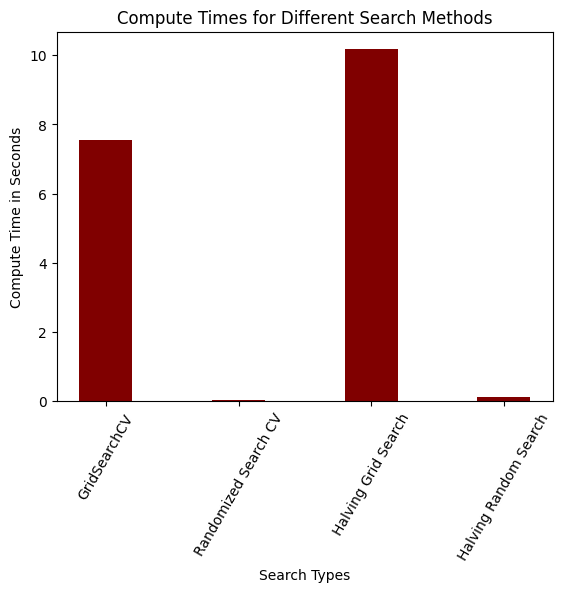

In [30]:
columns=['GridSearchCV','Randomized Search CV','Halving Grid Search','Halving Random Search']

plt.bar(columns, times, color ='maroon', width = 0.4)
plt.xlabel("Search Types")
plt.xticks(rotation=60)
plt.ylabel("Compute Time in Seconds")
plt.title("Compute Times for Different Search Methods")




Text(0.5, 1.0, 'Accuracy Scores for Different Search Methods')

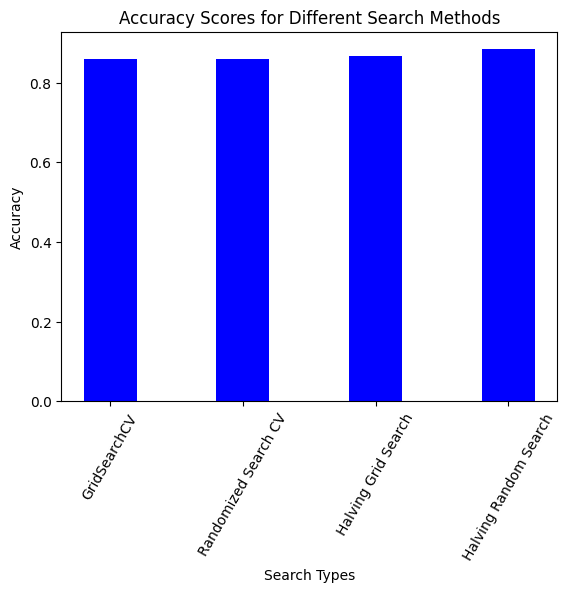

In [31]:
plt.bar(columns, scores, color ='b', width = 0.4)
plt.xlabel("Search Types")
plt.xticks(rotation=60)
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Different Search Methods")